<a href="https://colab.research.google.com/github/AbhayNath001/CODSOFT/blob/main/Task-3%20(IRIS%20FLOWER%20CLASSIFICATION)/CodSoft_Task_3_(Abhay_Nath).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide iris measurements:
Sepal Length: 6.3
Sepal Width: 2.3
Petal Length: 1.4
Petal Width: 1.5
Predicted Iris Species: Iris-setosa


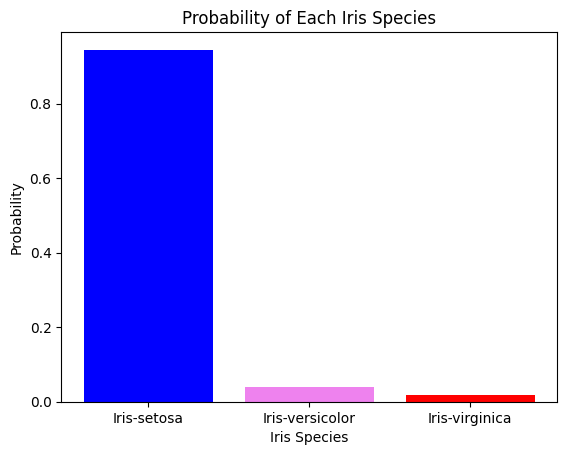

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("IRIS.csv")

def preprocess_data(df):
    label_encoder = LabelEncoder()
    df["species"] = label_encoder.fit_transform(df["species"])
    return df

data = preprocess_data(data)
X = data.drop(columns=["species"])
y = data["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier()
model.fit(X_train, y_train)

def predict_species():
    # ------------------------User Input--------------------------------------------
    print("Please provide iris measurements:")
    sepal_length = float(input("Sepal Length: "))
    sepal_width = float(input("Sepal Width: "))
    petal_length = float(input("Petal Length: "))
    petal_width = float(input("Petal Width: "))

    user_input = pd.DataFrame(
        {
            "sepal_length": [sepal_length],
            "sepal_width": [sepal_width],
            "petal_length": [petal_length],
            "petal_width": [petal_width],
        }
    )

    # --------------prediction-----------------------------------------
    prediction = model.predict(user_input)
    probabilities = model.predict_proba(user_input)[0]

    if prediction == 0:
        print("Predicted Iris Species: Iris-setosa")
    elif prediction == 1:
        print("Predicted Iris Species: Iris-versicolor")
    else:
        print("Predicted Iris Species: Iris-virginica")

    # --------------plotting probabilities-----------------------------------------
    species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plt.bar(species_names, probabilities, color=['blue', 'violet', 'red'])
    plt.xlabel('Iris Species')
    plt.ylabel('Probability')
    plt.title('Probability of Each Iris Species')
    plt.show()

predict_species()
